# Web Scraping Tutorial

# Beautiful Soup

In [83]:
# Beautiful Soup4 used to get info from a website that doesn't have a proper API
# Libraries used will be pandas, numpy, matplotlib,beautifulsoup4 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# %matplotlib inline # this tells matplotlib to print results on this page, it's only for Jupiter notebook IDE mostly
from urllib.request import urlopen # makes us open a url
from bs4 import BeautifulSoup
import re 
#re is for manipulating our regular expressions




In [84]:
url= "https://www.hubertiming.com/results/2018MLK" #open link for the website
html= urlopen(url) # this is from the url library we impoted above



In [85]:
soup= BeautifulSoup(html) #pulls all data from the website


In [86]:
# Extracting data from the website now
title= soup.title
print(title.text)


Race results for the 2018 MLK Dream Run!


In [87]:
title= soup.title 
print(title) # to know what's in title



<title>Race results for the 2018 MLK Dream Run!</title>


In [88]:
LinksIntheWeb= soup.find_all("a")
print(LinksIntheWeb)


[<a href="https://www.mlkdreamrun.com/" target="_blank">MLK Dream Run</a>, <a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>, <a href="https://www.hubertiming.com">Huber Timing Home</a>, <a class="btn btn-primary btn-lg" href="/results/2018MLK10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 10K</a>, <a class="btn btn-primary btn-lg" href="/results/2018MLK15K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 15K</a>, <a class="btn btn-primary btn-lg" href="/results/summary/2018MLK" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>, <a id="individual" name="individual"></a>, <a data-url="/results/2018MLK" href="#tabs-1" id="rootTab" style="font-size: 18px">5K Results</a>, <a href="https://www.hubertiming.com/"><img height="65" src="https://www.hubertiming.com//sites/all/themes/hubertiming/images/clockWithFinishSign_small.png" width="50"/>Huber T

In [89]:
LinksIntheWeb= soup.find_all("a", href=True)
for link in LinksIntheWeb:
    print(link["href"]) # this prints one on each line



https://www.mlkdreamrun.com/
mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2018MLK10K
/results/2018MLK15K
/results/summary/2018MLK
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/


In [90]:
# get data of the page
allrows= soup.find_all("tr")
print(allrows)


[<tr colspan="2">
<b>5K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>191</td>
</tr>, <tr>
<td>Male:</td>
<td>78</td>
</tr>, <tr>
<td>Female:</td>
<td>113</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>Age</th>
<th>City</th>
<th>State</th>
<th>Chip Pace</th>
<th>Time</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
</tr>, <tr data-bib="1191">
<td>1</td>
<td>1191</td>
<td>

                    MAX RANDOLPH

                </td>
<td>M</td>
<td>29</td>
<td>WASHINGTON</td>
<td>DC</td>
<td>5:25</td>
<td>16:48</td>
<td>

                    1 of 78

                </td>
<td>M 21-39</td>
<td>

                    1 of 33

                </td>
<td>0:08</td>
<td>16:56</td>
</tr>, <tr data-bib="1080">
<td>2</td>
<td>1080</td>
<td>

                    NEED NAME KAISER RUNNER

                </td>
<td>M</td>
<td>25</td>
<td>PORTLAND</td>
<td>OR</td>
<td>5:39</td>
<td>17:31</td>
<td>

     

In [91]:
# print just a few rows
# get data of the page
allrows= soup.find_all("tr")
print(allrows[2]) # this prints row 2 only


<tr>
<td>Male:</td>
<td>78</td>
</tr>


In [92]:
# print just a few rows
# get data of the page
allrows= soup.find_all("tr")
print(allrows[:10]) # this prints upto row 10 only


[<tr colspan="2">
<b>5K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>191</td>
</tr>, <tr>
<td>Male:</td>
<td>78</td>
</tr>, <tr>
<td>Female:</td>
<td>113</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>Age</th>
<th>City</th>
<th>State</th>
<th>Chip Pace</th>
<th>Time</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
</tr>, <tr data-bib="1191">
<td>1</td>
<td>1191</td>
<td>

                    MAX RANDOLPH

                </td>
<td>M</td>
<td>29</td>
<td>WASHINGTON</td>
<td>DC</td>
<td>5:25</td>
<td>16:48</td>
<td>

                    1 of 78

                </td>
<td>M 21-39</td>
<td>

                    1 of 33

                </td>
<td>0:08</td>
<td>16:56</td>
</tr>, <tr data-bib="1080">
<td>2</td>
<td>1080</td>
<td>

                    NEED NAME KAISER RUNNER

                </td>
<td>M</td>
<td>25</td>
<td>PORTLAND</td>
<td>OR</td>
<td>5:39</td>
<td>17:31</td>
<td>

     

In [93]:
# getting table data
allrows= soup.find_all("tr")
for row in allrows:
    row_DataList= row.find_all("td")
print(row_DataList)
    



[<td>191</td>, <td>1216</td>, <td>

                    ZULMA OCHOA

                </td>, <td>F</td>, <td>40</td>, <td>GRESHAM</td>, <td>OR</td>, <td>33:22</td>, <td>1:43:27</td>, <td>

                    113 of 113

                </td>, <td>F 40-54</td>, <td>

                    37 of 37

                </td>, <td>0:00</td>, <td>1:43:27</td>]


In [94]:
allrows= soup.find_all("tr")
for row in allrows:
    row_DataList= row.find_all("td")
for cell in row_DataList:
    print(cell.text)


191
1216


                    ZULMA OCHOA

                
F
40
GRESHAM
OR
33:22
1:43:27


                    113 of 113

                
F 40-54


                    37 of 37

                
0:00
1:43:27


In [95]:
DataA= []
allrows= soup.find_all("tr")
for row in allrows:
    row_DataList= row.find_all("td")
    DataRow= []
for cell in row_DataList:
    DataRow.append(cell.text)
DataA.append(DataRow)

print(DataA)


[['191', '1216', '\r\n\r\n                    ZULMA OCHOA\r\n\r\n                ', 'F', '40', 'GRESHAM', 'OR', '33:22', '1:43:27', '\r\n\r\n                    113 of 113\r\n\r\n                ', 'F 40-54', '\r\n\r\n                    37 of 37\r\n\r\n                ', '0:00', '1:43:27']]


In [111]:
# printing just a few info of the data
DataA= []
allrows= soup.find_all("tr")
for row in allrows:
    row_DataList= row.find_all("td")
    DataRow= []
for cell in row_DataList:
    DataRow.append(cell.text)
DataA.append(DataRow)

print(DataA[1:])


[]


In [97]:
# printing just a few info of the data
DataA= []
allrows= soup.find_all("tr")
for row in allrows:
    row_DataList= row.find_all("td")
    DataRow= []
for cell in row_DataList:
    DataRow.append(cell.text)
DataA.append(DataRow)
DataA= DataA[:1] # to ensure we can use the rest of the data incase need be
print(DataA[:1])


[['191', '1216', '\r\n\r\n                    ZULMA OCHOA\r\n\r\n                ', 'F', '40', 'GRESHAM', 'OR', '33:22', '1:43:27', '\r\n\r\n                    113 of 113\r\n\r\n                ', 'F 40-54', '\r\n\r\n                    37 of 37\r\n\r\n                ', '0:00', '1:43:27']]


In [98]:
# printing just a few info of the data
DataA= []
allrows= soup.find_all("tr")
for row in allrows:
    row_DataList= row.find_all("td")
    DataRow= []
for cell in row_DataList:
    DataRow.append(cell.text)
DataA.append(DataRow)
DataTitles= DataA[0]
DataA= DataA[:1] # to ensure we can use the rest of the data incase need be
print(DataTitles) # my output has an issue..will need recheck, only one row is available
print(DataA[:1])


['191', '1216', '\r\n\r\n                    ZULMA OCHOA\r\n\r\n                ', 'F', '40', 'GRESHAM', 'OR', '33:22', '1:43:27', '\r\n\r\n                    113 of 113\r\n\r\n                ', 'F 40-54', '\r\n\r\n                    37 of 37\r\n\r\n                ', '0:00', '1:43:27']
[['191', '1216', '\r\n\r\n                    ZULMA OCHOA\r\n\r\n                ', 'F', '40', 'GRESHAM', 'OR', '33:22', '1:43:27', '\r\n\r\n                    113 of 113\r\n\r\n                ', 'F 40-54', '\r\n\r\n                    37 of 37\r\n\r\n                ', '0:00', '1:43:27']]


In [99]:
# printing just a few info of the data
DataA= []
allrows= soup.find_all("tr")
for row in allrows:
    row_DataList= row.find_all("td")
    DataRow= []
for cell in row_DataList:
    DataRow.append(cell.text)
DataA.append(DataRow)
DataA= DataA[:1] # to ensure we can use the rest of the data incase need be

print(DataA[-2:])
 # I have removed DataTitles coz it't unnecessary here


[['191', '1216', '\r\n\r\n                    ZULMA OCHOA\r\n\r\n                ', 'F', '40', 'GRESHAM', 'OR', '33:22', '1:43:27', '\r\n\r\n                    113 of 113\r\n\r\n                ', 'F 40-54', '\r\n\r\n                    37 of 37\r\n\r\n                ', '0:00', '1:43:27']]


In [123]:
# Introduce pandas now
# printing just a few info of the data
DataA= []
allrows= soup.find_all("tr")
for row in allrows:
    row_DataList= row.find_all("td")
    DataRow= []
for cell in row_DataList:
    DataRow.append(cell.text)
DataA.append(DataRow)
DataA= DataA[:1] # to ensure we can use the rest of the data incase need be

print(DataA[-2:])
 # I have removed DataTitles coz it't unnecessary here
 
df= pd.DataFrame(DataA)
print(df.head())


[['191', '1216', '\r\n\r\n                    ZULMA OCHOA\r\n\r\n                ', 'F', '40', 'GRESHAM', 'OR', '33:22', '1:43:27', '\r\n\r\n                    113 of 113\r\n\r\n                ', 'F 40-54', '\r\n\r\n                    37 of 37\r\n\r\n                ', '0:00', '1:43:27']]
    0     1                                                  2  3   4   \
0  191  1216  \r\n\r\n                    ZULMA OCHOA\r\n\r\...  F  40   

        5   6      7        8   \
0  GRESHAM  OR  33:22  1:43:27   

                                                  9        10  \
0  \r\n\r\n                    113 of 113\r\n\r\n...  F 40-54   

                                                  11    12       13  
0  \r\n\r\n                    37 of 37\r\n\r\n  ...  0:00  1:43:27  


In [133]:
print(df.tail())


    0     1                                                  2  3   4   \
0  191  1216  \r\n\r\n                    ZULMA OCHOA\r\n\r\...  F  40   

        5   6      7        8   \
0  GRESHAM  OR  33:22  1:43:27   

                                                  9        10  \
0  \r\n\r\n                    113 of 113\r\n\r\n...  F 40-54   

                                                  11    12       13  
0  \r\n\r\n                    37 of 37\r\n\r\n  ...  0:00  1:43:27  


In [140]:
# checking headers in each column
col_headers= soup.find_all("th")
print(col_headers)


[<th>Place</th>, <th>Bib</th>, <th>Name</th>, <th>Gender</th>, <th>Age</th>, <th>City</th>, <th>State</th>, <th>Chip Pace</th>, <th>Time</th>, <th>Gender Place</th>, <th>Age Group</th>, <th>Age Group Place</th>, <th>Time to Start</th>, <th>Gun Time</th>]


In [142]:
header_list= []
col_headers= soup.find_all("th")
for col in col_headers:
    header_list.append(col.text)
    
print(header_list)


['Place', 'Bib', 'Name', 'Gender', 'Age', 'City', 'State', 'Chip Pace', 'Time', 'Gender Place', 'Age Group', 'Age Group Place', 'Time to Start', 'Gun Time']


In [143]:
# using pandas, although my data has issues
df.columns= header_list
print(df.head())


  Place   Bib                                               Name Gender Age  \
0   191  1216  \r\n\r\n                    ZULMA OCHOA\r\n\r\...      F  40   

      City State Chip Pace     Time  \
0  GRESHAM    OR     33:22  1:43:27   

                                        Gender Place Age Group  \
0  \r\n\r\n                    113 of 113\r\n\r\n...   F 40-54   

                                     Age Group Place Time to Start Gun Time  
0  \r\n\r\n                    37 of 37\r\n\r\n  ...          0:00  1:43:27  


In [145]:
print (df.info()) # to know what's in the website/dataframe taken


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Place            1 non-null      object
 1   Bib              1 non-null      object
 2   Name             1 non-null      object
 3   Gender           1 non-null      object
 4   Age              1 non-null      object
 5   City             1 non-null      object
 6   State            1 non-null      object
 7   Chip Pace        1 non-null      object
 8   Time             1 non-null      object
 9   Gender Place     1 non-null      object
 10  Age Group        1 non-null      object
 11  Age Group Place  1 non-null      object
 12  Time to Start    1 non-null      object
 13  Gun Time         1 non-null      object
dtypes: object(14)
memory usage: 244.0+ bytes
None


In [146]:
df.shape
# should be (191,14), will check on that to see what the issue is


(1, 14)

In [147]:
df2= df.dropna(axis=0, how="any") # 0 is always the default


In [148]:
df2= df.dropna(how="any") # axis=0 is always the default


In [153]:
df2["GunTime_minutes"] = pd.to_timedelta(df2["Gun Time"]) # guntime is in the table/website being scraped

df2["GunTime_minutes"] = df2["GunTime_minutes"].astype("timedelta64[s]")
df2[["GunTime_minutes"]].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   GunTime_minutes  1 non-null      timedelta64[s]
dtypes: timedelta64[s](1)
memory usage: 140.0 bytes


In [154]:
df2["GunTime_minutes"] = pd.to_timedelta(df2["Gun Time"]) # guntime is in the table/website being scraped

df2["GunTime_minutes"] = df2["GunTime_minutes"].astype("timedelta64[s]")/60 # /60 to make it miuntes from seconds
df2[["GunTime_minutes"]].info()
print(df2[["GunTime_minutes"]].head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   GunTime_minutes  1 non-null      timedelta64[s]
dtypes: timedelta64[s](1)
memory usage: 140.0 bytes
  GunTime_minutes
0 0 days 00:01:43


Text(0.5, 1.0, 'Comparison of average minutes run by Male and Female')

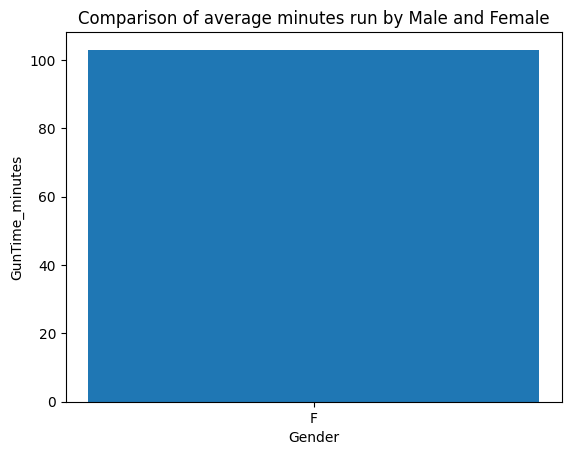

In [156]:
plt.bar(df2["Gender"], df2["GunTime_minutes"])
plt.xlabel("Gender")
plt.ylabel("GunTime_minutes")
plt.title("Comparison of average minutes run by Male and Female")

# The  graph below is wrong due to dataframe issue...will check later
# my df has only 1 row instead of 191-rows, and 14 columns
